
# Prompt Engineering: Setting Up Work Environment

1. Introduction
This script demonstrates various techniques in prompt engineering to effectively interact with language models like OpenAI's GPT-4. It covers setting up the environment, writing clear instructions, using delimiters, role assignments, structured outputs, and condition checks.


## Step 1. Setting Up Work Environment


### Installing & Importing Necessary Libraries
- **Purpose**: Import the OpenAI library to interact with the GPT-4 model.

- **kagglehub**: Used to download datasets from Kaggle.

In [1]:
!pip install httpx==0.23.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.4/68.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Successfully uninstalled h11-0.14.0
  Attempting uninstall: httpcore
    Found existing installation: httpcore 1.0.7
    Uninstalling httpcore-1.0.7:
      Successfully uninstalled httpcore-1.0.7
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.1
    Uninstalling httpx-0.28.1:
      Successfully uninstalled httpx-0.28.1


In [2]:
!pip install openai kagglehub

## Step 2. Setting Up API Key
Set up the API key for authentication. Replace `'your-api-key'` with your actual OpenAI API key.

In [3]:
import openai
openai.api_key = "your-api-key"


### Call GPT-4o Model
**call_gpt4**: A function to send a prompt to the GPT-4o model and return the response. It handles exceptions and allows for adjusting the creativity level with the `temperature` parameter.

In [8]:
# Function to generate GPT-4o output
def summarize_dialogue(prompt, model="gpt-4o"):
    """
    Function to call GPT-4o API and return the summary output.
    """
    try:
        response = openai.chat.completions.create(
            model="gpt-4o",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.7,  # Adjust creativity level
            max_tokens=150
        )
        return response.choices[0].message.content
    except Exception as e:
        return f"An error occurred: {e}"



## Step 3: Download the Harry Potter dataset from Kaggle
- Downloads the **`Harry Potter Book & Philosopher Stone`** dataset from Kaggle and prints the path to the dataset files.
---


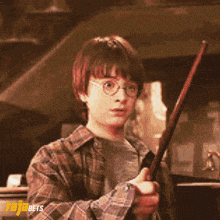

In [4]:
# Download latest version of the Harry Potter Book 1 dataset
import kagglehub
import pandas as pd

# Step 1: Download the Harry Potter dataset from Kaggle
path = kagglehub.dataset_download("eward96/harry-potter-and-the-philosophers-stone-script")
print("Path to dataset files:", path)

100%|██████████| 24.6k/24.6k [00:00<00:00, 16.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/eward96/harry-potter-and-the-philosophers-stone-script/versions/1



Load the Harry Potter script dataset

In [6]:
# Step 2: Load the Harry Potter script dataset
file_path = path + "/hp_script.csv"  # Adjust filename if necessary
df = pd.read_csv(file_path, encoding='latin-1')


Display the first few rows to confirm loading

In [7]:
# Display the first few rows to confirm loading
print("Dataset Loaded Successfully!\n")
print(df.head())

Dataset Loaded Successfully!

   ID_number  scene      character_name  \
0          1      1    Albus Dumbledore   
1          2      1  Minerva McGonagall   
2          3      1    Albus Dumbledore   
3          4      1  Minerva McGonagall   
4          5      1    Albus Dumbledore   

                                            dialogue  
0  I should have known that you would be here, Pr...  
1  Good evening, Professor Dumbledore. Are the ru...  
2   I'm afraid so, Professor. The good, and the bad.  
3                                       And the boy?  
4                            Hagrid is bringing him.  



## Step 4: Extract Sample Dialogue from the Dataset

You can choose any characters from the list below:


```
# print(df['character_name'].unique())

['Albus Dumbledore' 'Minerva McGonagall' 'Rubeus Hagrid' 'Petunia Dursley'
 'Dudley Dursley' 'Vernon Dursley' 'Harry Potter' 'Snake' 'Tom'
 'Doris Crockford' 'Quirinus Quirrell' 'Goblin' 'Griphook'
 'Garrick Ollivander' 'Guard' 'Molly Weasley' 'George Weasley'
 'Fred Weasley' 'Ginny Weasley' 'Ron Weasley' 'Trolley lady'
 'Hermione Granger' 'Neville Longbottom' 'Draco Malfoy' 'Sorting Hat'
 'Seamus Finnigan' 'Percy Weasley' 'Nearly Headless Nick' 'Bloody Baron'
 'The Fat Lady' 'Severus Snape' 'Rolanda Hooch' 'Class' 'Argus Filch'
 'Oliver Wood' 'Filius Flitwick' 'Lee Jordan' 'Marcus Flint' 'Man'
 'Firenze' 'Voldemort']
```




## Step 5: Summarizing Using Instruction-Based Prompts

In [21]:
# Extract dialogues spoken by 'Harry Potter'
sample_dialogue = df[df['character_name'] == 'Harry Potter'].head(20)['dialogue'].tolist()

# Print the dialogue text
if sample_dialogue:
    dialogue_text = "\n".join([f"Line {i+1}: {line}" for i, line in enumerate(sample_dialogue)])
    print("Sample Dialogue for Summarization Of Harry Potter:\n")
    print(dialogue_text)
else:
    print("No dialogue found for the character 'Harry Potter'.")


Sample Dialogue for Summarization Of Harry Potter:

Line 1: Yes, Aunt Petunia.
Line 2: Yes, Uncle Vernon.
Line 3: He's asleep!
Line 4: Sorry about him. He doesn't understand what it's like, lying there day after day, having people press their ugly faces in on you.
Line 5: Can you hear me? It's just I've never talked to a snake before. Do you I mean do you talk to people often?
Line 6: You're from Burma, aren't you? Was it nice there, do you miss your family?
Line 7: I see. That's me as well. I never knew my parents, either.
Line 8: Any time.
Line 9: Ow!
Line 10: I swear I don't know! One minute, the glass was there and then it was gone! It was like magic!
Line 11: Hey, give it back! It's mine!
Line 12: Because there's no post on Sunday?
Line 13: Get off! Ahh!
Line 14: They're my letters! Let go of me!
Line 15: Make a wish, Harry.
Line 16: I-I am.
Line 17: Thank you!
Line 18: Excuse me, who are you?
Line 19: Sorry, no.
Line 20: Learned what?



### One-shot Example
Explanation: `One-shot prompting` involves asking the model to perform a task providing only one example or context.

In [22]:
# One-shot Example
instruction_one_shot = (
    "Summarize the following lines of dialogue spoken by Harry Potter in a concise sentence:\n\n"
    f"{dialogue_text}\n\nSummary:"
)
print("**One-Shot Instruction-Based Summary:**")
print(summarize_dialogue(instruction_one_shot))

**One-Shot Instruction-Based Summary:**
Harry interacts with his relatives and a snake, expressing curiosity and confusion about magical occurrences, while standing up for himself regarding his belongings and identity.


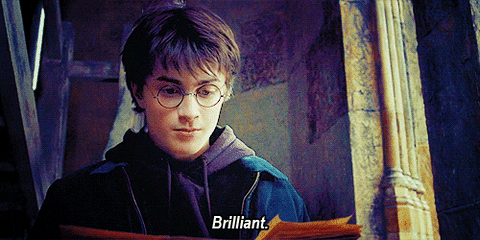


###  Few-shot Example
Explanation: `Few-shot prompting` provides a small number of examples to guide the model in completing a task. These examples help the model understand the format and style of the desired output.
It is called ***`'few-shot'`*** because the model is given only a ***`few examples`*** to learn the expected behavior before being asked to perform the task on new data.

In [23]:
# Few-shot Example
instruction_few_shot = (
    "Summarize the following lines of dialogue spoken by characters:\n\n"
    "Character: Hermione Granger\n"
    "Line 1: 'It’s leviOsa, not levioSA!'\n"
    "Line 2: 'I’ve read about this spell in our textbook.'\n"
    "Summary: Hermione corrects Ron's pronunciation and refers to her studies.\n\n"
    "Character: Harry Potter\n"
    f"{dialogue_text}\n\nSummary:"
)
print("\n**Few-Shot Instruction-Based Summary:**")
print(summarize_dialogue(instruction_few_shot))


**Few-Shot Instruction-Based Summary:**
Harry Potter's dialogue reflects his interactions with his relatives, showing a submissive attitude towards Aunt Petunia and Uncle Vernon. He engages in a conversation with a snake, expressing empathy and curiosity about its origins and family, which parallels his own lack of family connections. Harry experiences confusion and wonder when magical events occur, like the disappearing glass, and is protective over his belongings, such as his letters. He also shows gratitude and curiosity towards new experiences and people, asking questions and expressing thanks.



## Step 6: Summarizing Using Context-Setting Prompts

### One-shot Example

In [24]:
# One-shot Example
context_one_shot = (
    "You are an AI that summarizes dialogues into concise sentences. Focus on the key points.\n\n"
    f"Character: Harry Potter\n"
    f"Dialogue:\n{dialogue_text}\n\nSummary:"
)
print("**One-Shot Context-Setting Summary:**")
print(summarize_dialogue(context_one_shot))

**One-Shot Context-Setting Summary:**
Harry interacts with his relatives and a snake, expressing empathy for its captivity. He accidentally performs magic, causing confusion over disappearing glass, and insists on receiving his letters. Harry is also curious about a stranger's identity and questions what they have learned.



### Few-shot Example

In [25]:
# Few-shot Example
context_few_shot = (
    "You are an AI assistant that summarizes dialogues into concise sentences. Here are examples:\n\n"
    "Character: Ron Weasley\n"
    "Line 1: 'Bloody hell, Harry!'\n"
    "Line 2: 'I think this is the entrance to the chamber.'\n"
    "Summary: Ron expresses surprise and identifies the chamber entrance.\n\n"
    f"Character: Harry Potter\n"
    f"Dialogue:\n{dialogue_text}\n\nSummary:"
)
print("\n**Few-Shot Context-Setting Summary:**")
print(summarize_dialogue(context_few_shot))


**Few-Shot Context-Setting Summary:**
Harry interacts with his relatives, converses with a snake about shared experiences of feeling isolated, and expresses confusion and frustration over magical occurrences and lost letters.
